# The Smith Parasite Project <img align='right' width='100' height='125' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>

## <font color='SeaGreen'>__Data Description__</font><br>

The Data Description Phase aims to preliminarily understand the structure of the data, this process will allow us to get familiarized with the data and have some first impressions of patterns and relations, errors and associated changes.

The Data Description is composed by 4 steps:
1. Data Collection - To understand the location of the data files, their format, and import them to the project.
2. Data Description - Describing the structure of the tables imported in step 1, i.e number of rows, columns, datatypes; as well as showcasing some values
3. Data Exploration - Exploring the data with some high-level aggregate statistical analysis, to have a preliminary understanding of patterns and start hypothesizing about how the attributes relate.
4. Data Quality Verification - Identifying errors in data values, such as inconsistent types, duplicate rows, and missing values



#### TASKS
1. Repetir e publicar todo o notebook (para corrigir o erro de outputs duplicados) [DONE]+  Completar a introdução do capítulo Data Description [DONE]
2. Missing Values (13 of Education)
3. Outliers (Age parece ter pessoas do século 19)
4. Descrição visual dos dados
5. Interpretação dos gráficos (Depende do passo 4.)
6. Remoção de duplicados.

#### Features
- *__PatientID__* - The unique identifier of the patient
- *__Name__* - The name of the patient
- *__Birth_Year__* - Patient Year of Birth
- *__Region__* - Patient Living Region
- *__Education__* - What is the highest grade or year of school you have?
- *__Disease__* - If the patient has the disease (Disease = 1) or not (Disease =               0)
- *__Smoking_Habit__* - Do you smoke more than 10 cigars daily?
- *__Drinking_Habit__* - What is your behavior concerning alcohol consumption?
- *__Exercise__* - Do you exercise (more than 30 minutes) 3 times per week or                  more?
- *__Fruit_Habit__* - How many portions of fruits do you consume per day?
- *__Water_Habit__* - How much water do you drink per day?
- *__Height__* - Patient’s height
- *__Weight__* - Patient’s weight
- *__High_Cholesterol__* - Cholesterol value
- *__Blood_Pressure__* - Blood Pressure in rest value
- *__Mental_Health__* - During the past 30 days, for about how many days did                         poor physical or mental health keep you from doing your                     usual activities, such as self-care, work, or                               recreation?
- *__Physical_Health__* - Thinking about your physical health, which includes                         physical illness and injury, for how many days during                       the past 30 days was your physical health not good to                       the point where it was difficult to walk?
- *__Checkup__* - How long has it been since you last visited a doctor for a                   routine Checkup?
- *__Diabetes__* - (Ever told) you or your direct relatives have diabetes?

### 📋 Index

> #### 1. Data Collection
> #### 2. Data Description
> #### 3. Data Quality Verification
> #### 4. Data Preparation
>> #### 4.1 Handling Duplicate and Missing Values
>> #### 4.2 Handling Outliers
>>> #### 4.2.1 Z-Score Approach 
>>> #### 4.2.2 IQR Method Approach
> #### 5. Feature Selection

### <font color='SeaGreen'> 1. Data Collection </font>
Libraries, data file path, and importing of the data

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
from math import ceil
import scipy.stats as stats

In [2]:
current_path = os.getcwd() # current directory (dir)
path = os.path.join(current_path, 'the-smith-parasite-dataset') # joins data folder dir

data_files = glob.glob(path + '/*xlsx') # gets excel files in folder

# creating lists with training an test data
train = []
test = []

for data in data_files: 
    if 'train' in data:
        train.append(pd.read_excel(data)) 
    else: 
        test.append(pd.read_excel(data))

# setting Patient ID as index in all dataframes 
for data_idx in range(len(train)): #
    train[data_idx] = train[data_idx].set_index('PatientID')
    test[data_idx] = test[data_idx].set_index('PatientID')

# merging data
train_data = pd.concat(train, axis=1)

test_data = pd.concat(test, axis=1)

# checking data import
display(train_data.head(2),test_data.head(2))

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters


,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline diabetes
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes


#Variables for simplifying the path of the data
currentpath = os.getcwd()
datapath = os.path.join(currentpath, "the-smith-parasite-dataset")

#Train datasets import
train_demo = pd.read_excel(datapath + "/train_demo.xlsx")
train_habits = pd.read_excel(datapath + '\train_habits.xlsx")
train_health = pd.read_excel(datapath + "\\train_health.xlsx")

"""
#Test datasets import
test_demo = pd.read_excel(datapath + "\\test_demo.xlsx")
test_habits = pd.read_excel(datapath + "\\test_habits.xlsx")
test_health = pd.read_excel(datapath + "\\test_health.xlsx")
"""


### <font color='SeaGreen'>2. Data Description </font>
Sample displaying, merging the tables into one and description with count(), info() and describe() methods

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Height            800 non-null    int64 
 1   Weight            800 non-null    int64 
 2   High_Cholesterol  800 non-null    int64 
 3   Blood_Pressure    800 non-null    int64 
 4   Mental_Health     800 non-null    int64 
 5   Physical_Health   800 non-null    int64 
 6   Checkup           800 non-null    object
 7   Diabetes          800 non-null    object
 8   Name              800 non-null    object
 9   Birth_Year        800 non-null    int64 
 10  Region            800 non-null    object
 11  Education         787 non-null    object
 12  Disease           800 non-null    int64 
 13  Smoking_Habit     800 non-null    object
 14  Drinking_Habit    800 non-null    object
 15  Exercise          800 non-null    object
 16  Fruit_Habit       800 non-null    object
 17  Water_Habit 

In [4]:
train_data.describe().T[1:]

,count,mean,std,min,25%,50%,75%,max
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0


In [5]:
train_data.describe(include='O').T

#There is one repeated name
#There are rows without Education data

NumExpr defaulting to 8 threads.


,count,unique,top,freq
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392
Name,800,799,Mr. Gary Miller,2
Region,800,10,East Midlands,154
Education,787,6,University Complete (3 or more years),239
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364


### <font color='SeaGreen'>3. Data Exploration </font>
Correlations with data, plotting of correlations, hypothesizing.

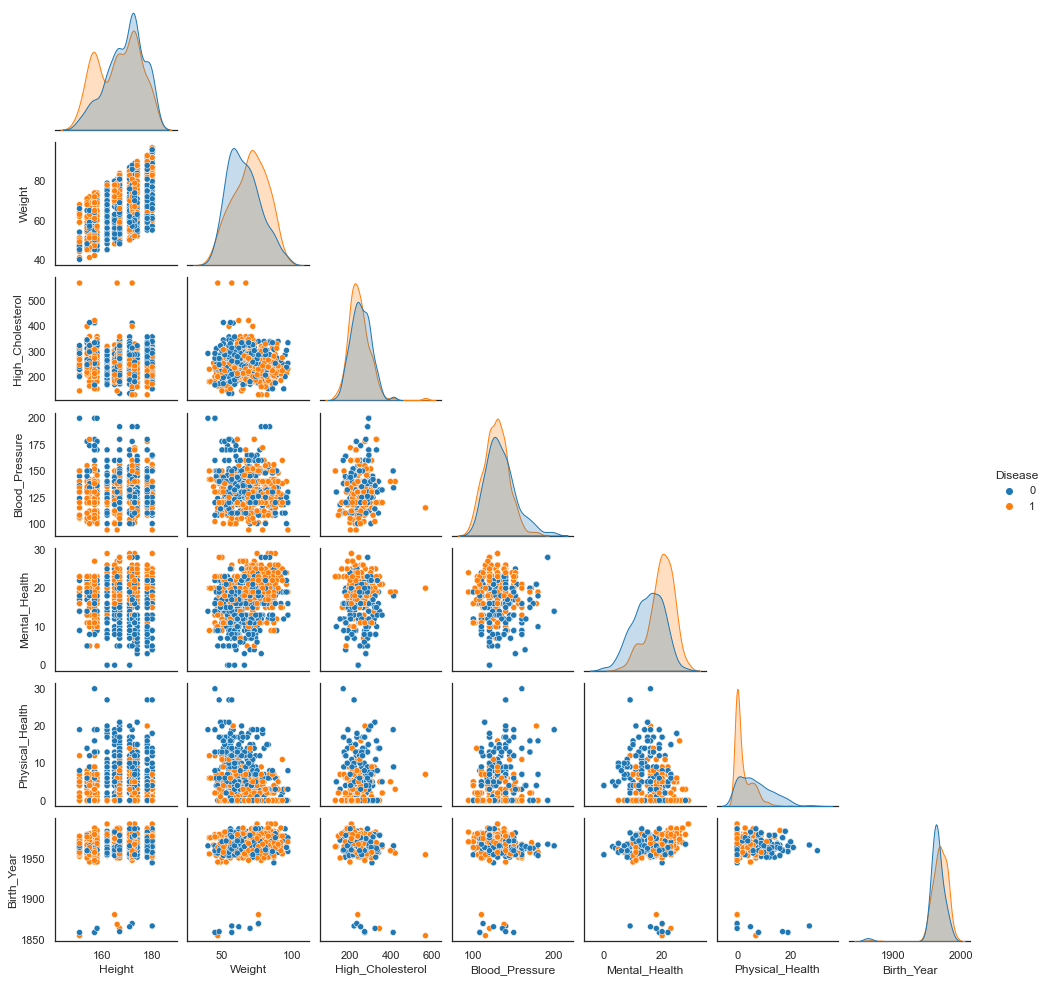

In [36]:
# Layout
plt.rcParams['font.size'] = '20'


# Plot
ax = sns.pairplot(train_data, diag_kind = 'kde', corner = True, hue = 'Disease', height = 2)

plt.show()

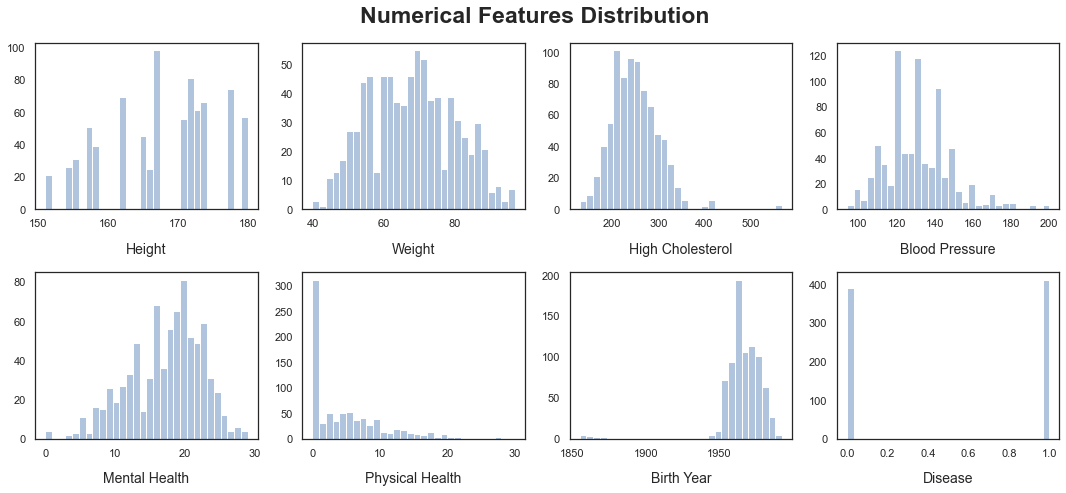

In [49]:
# All numeric features in one figure
sns.set_theme(style = 'white', palette = None)

# Selecting numeric features
numerical = train_data.select_dtypes(include = ['float64', 'int64']).columns
        
# Plot
fig, axes = plt.subplots(nrows = 2, ncols = ceil(len(numerical)/2) , figsize = (15,7))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, col in zip(axes.flatten(), numerical): # Notice the zip() function and flatten() method
    ax.hist(train_data[col], bins=30, color = 'lightsteelblue')
    ax.set_title(col.replace('_', ' '), y = -.30, fontsize=14)
    
# Layout
plt.suptitle('Numerical Features Distribution', fontsize = 23, fontweight = 'bold')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None) 

plt.tight_layout()

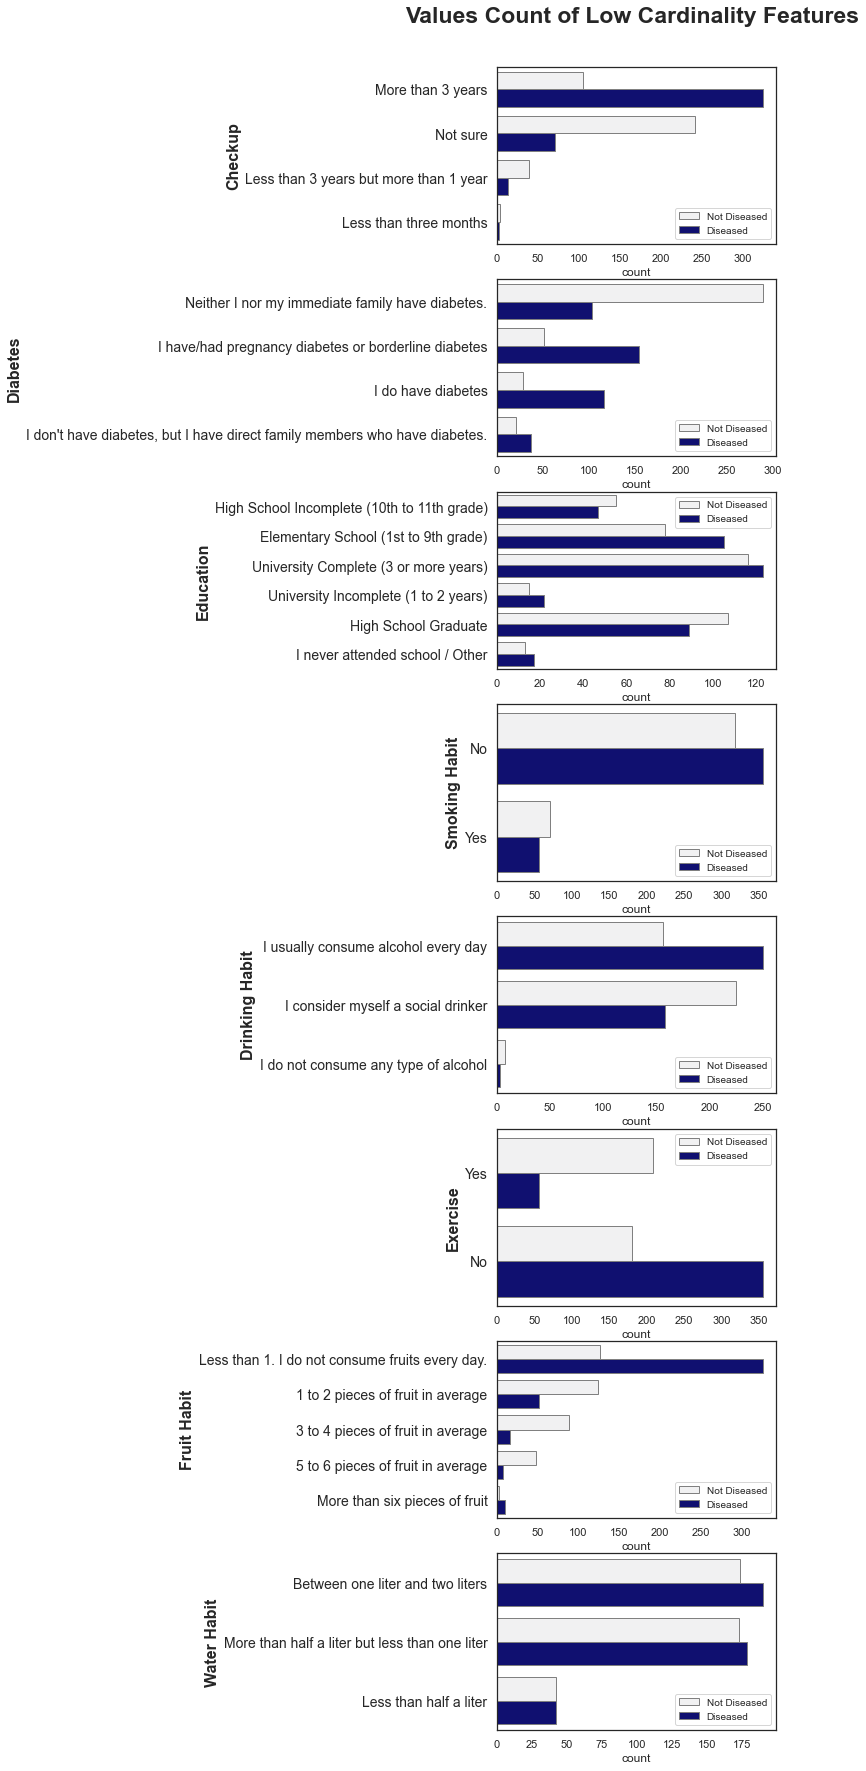

In [8]:
# Subseting object features 
tmp = train_data.select_dtypes(include = ['O'])

# Getting low cardinality features
tmp = [col for col, rows in tmp.items() if len(rows.value_counts()) <= 7]

# Plot
fig, ax = plt.subplots(len(tmp), 1, figsize = (5,len(tmp)*3.5)) 

for i in range(len(tmp)): 
    sns.countplot(data = train_data,
                  y = train_data[tmp[i]],
                  hue='Disease',
                  color='navy',
                  edgecolor='gray',
                  ax = ax[i])
    # Customize
    if i == 0:
        ax[i].legend(title='', loc='lower right', labels=['Healthy','Diseased'],  prop={'size': 10})
    else:
        ax[i].legend(title='', loc=0, labels=['Not Diseased','Diseased'],  prop={'size': 10})
    ax[i].set_ylabel(tmp[i].replace('_', ' '), fontsize=16, fontweight='bold')
    ax[i].tick_params(axis='y', labelsize=14)

    
# Layout
plt.suptitle('Values Count of Low Cardinality Features', fontsize = 23, fontweight = 'bold')  
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.4, hspace=None) 

plt.show()

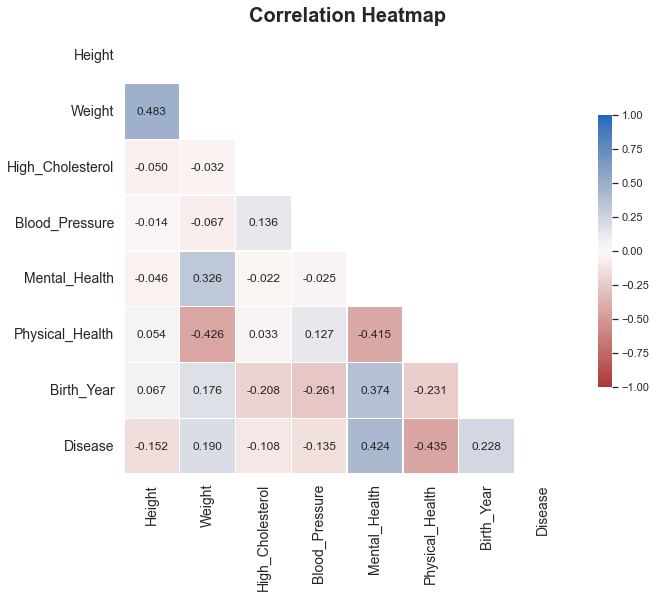

In [10]:
# Correlations analysis
# plot
cmap = sns.color_palette('vlag_r', as_cmap=True)

# Computing the correlation matrix
corr = train_data.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize = (10, 10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = .5, cbar_kws = {'shrink': .5}, annot = True, fmt = '.3f')

#customize
plt.title('Correlation Heatmap',fontsize = 20, fontweight = 'bold')


plt.show()

### <font color='SeaGreen'>4. Data Quality Verification</font>
#### <font color='SeaGreen'>4.2 Handling Duplicates and Missing Values</font>

In [10]:
train_data.isna().sum()
#The only NA are from education, one solution might be to create a new category as "No Education Information", for the 13 missing values

Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
dtype: int64

In [11]:
# In proportion, Educantion has only 1.6 % of NA values. 
print('\nEducation is categorical with the unique values:\n', train_data.Education.unique())
percentage = (train_data.isnull().sum()/train_data.shape[0]*100).round(1)
print('\nThe percentage of NAN values in each column is: \n',percentage)
# In proportion, Educantion has only 1.6 % of NA values. 
print('\nThe percentage of NAN values in Education is', percentage[4],',for this reason the NAN will be dropped.')

# The pros and cons associated to drop NAN values
# cons: drop causes loss of information and the analysis may be harmed due imbalance of categorical data.
# pros: is a simple way to eliminate NAN and should only be used when the incidence of NAN does not exceed 10%.
# train_data has only 1.6, for this reason the NAN will be dropped.

train_data2 = train_data.dropna(inplace = False, axis = 0)
print('\nThe percentage of NAN values in Education column after cleaning is', train_data2.isnull().sum()[4])

print('\nNumber of rows of train_data is', train_data.shape[0])
print('\nNumber of rows of train_data2, after cleaning NAN valeus is', train_data2.shape[0])


Education is categorical with the unique values:
 ['High School Incomplete (10th to 11th grade)'
 'Elementary School (1st to 9th grade)'
 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)' nan 'High School Graduate'
 'I never attended school / Other']

The percentage of NAN values in each column is: 
 Height              0.0
Weight              0.0
High_Cholesterol    0.0
Blood_Pressure      0.0
Mental_Health       0.0
Physical_Health     0.0
Checkup             0.0
Diabetes            0.0
Name                0.0
Birth_Year          0.0
Region              0.0
Education           1.6
Disease             0.0
Smoking_Habit       0.0
Drinking_Habit      0.0
Exercise            0.0
Fruit_Habit         0.0
Water_Habit         0.0
dtype: float64

The percentage of NAN values in Education is 0.0 ,for this reason the NAN will be dropped.

The percentage of NAN values in Education column after cleaning is 0

Number of rows of train_data is 800

Number of rows of tr

In [12]:
# Daniel - "vejam se gostam desta funçao que deteta missing values" ANA

# Missing values reporter function
def missing_value_reporter(data, threshold=None):
    '''
    Returns pandas dataframe with feature's missing values count in absolute and relative frequency
    after a threshold is parsed (max % of column missing values), so it'll tell if the features are 
    above or bellow the desired missing threshold limit (True for above or False for bellow).
    
    If the threshold is not provided, it defaults to None.
     Args:
        data - input for data
        threshold - input for threshold variable from 0 to 1
        
    '''
    na_count = data.isna().sum()
    na_count = na_count[na_count > 0]
    na_abs_frq = na_count.values
    na_rel_frq = round(na_count/len(data),2)
    missings = pd.DataFrame({'Feature': na_count.index, 'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)
    
    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
        
    return missings

In [13]:
# threshold on 10%
missing_value_reporter(data=train_data, threshold=0.1)

,Feature,Nº of missings,% of missings,Above threshold
Education,Education,13,0.02,False


#### <font color='SeaGreen'>4.2 Handling Outliers</font>

> #### 4.2.1 Z-Score Approach

In [32]:
# Checking outliers with Z-score test

# Selecting numeric features
tmp = train_data.select_dtypes(include = ['float64', 'int64'])

# Removing ID feature
for col, rows in tmp.items(): 
    if len(rows.value_counts()) == 2 or 'ID' in col: # removing binary and ID columns for test
        del tmp[col]

# Array with all observations Z-score
Z = np.abs(stats.zscore(tmp))

# Defining Z-score threshold
threshold = 3.5

# 2 arrays with the outliers respective row and column indices
positions = np.where(Z >= threshold) 
positions

(array([ 18,  22,  35,  61,  93, 198, 312, 312, 460, 493, 503, 511, 566,
        566, 585, 588, 593, 617, 640, 648, 705, 710, 729, 761, 797]),
 array([6, 2, 3, 6, 6, 6, 2, 6, 5, 6, 3, 5, 5, 6, 3, 5, 6, 3, 6, 6, 6, 3,
        2, 3, 6]))

In [33]:
# High Z-score values count
columns = positions[1]

for col in np.unique(columns): 
    col_name = tmp.columns[col].replace('_', ' ') # getting column name
    occurrences = np.count_nonzero(columns == col) # getting number of outliers per column
    print(f'The {col_name} feature has {occurrences} observations with a Z-score higher or equal to 3.5\n') 

The High Cholesterol feature has 3 observations with a Z-score higher or equal to 3.5

The Blood Pressure feature has 6 observations with a Z-score higher or equal to 3.5

The Physical Health feature has 4 observations with a Z-score higher or equal to 3.5

The Birth Year feature has 12 observations with a Z-score higher or equal to 3.5



In [45]:
def check_zscore_outliers(data, col):
    col_name = col.replace('_', ' ')
    tmp = data[col].reset_index()
    tmp.drop(tmp.columns[0], axis=1, inplace=True)
    Z = np.abs(stats.zscore(tmp))
    threshold = 3.5
    positions = np.where(Z >= threshold) 

    # Checking column range and outliers
    mini = data[col].min() 
    maxi = data[col].max() 
    print(f'The {col_name} feature ranges from {mini} to {maxi}\n\nOutlier values:\n')
    for row in positions[0]:
        print(f'Value from row {row}: ', tmp[col][row].round(2))

In [46]:
check_zscore_outliers(train_data, 'High_Cholesterol')

The High Cholesterol feature ranges from 130 to 568

Outlier values:

Value from row 22:  568
Value from row 312:  568
Value from row 729:  568


In [96]:
train_data.loc[train_data['High_Cholesterol'] > 500]

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1464,166,57,568,115,20,7,Not sure,I have/had pregnancy diabetes or borderline diabetes,Mrs. Jeanne Rogers,1955,East Midlands,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1158,151,47,568,115,20,7,Not sure,I have/had pregnancy diabetes or borderline diabetes,Mrs. Mary Hollingsworth,1855,South West,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1192,172,67,568,115,20,7,Not sure,I have/had pregnancy diabetes or borderline diabetes,Mrs. Karen Smallidge,1955,London,I never attended school / Other,1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters


In [50]:
# inconclusivo

In [47]:
check_zscore_outliers(train_data, 'Blood_Pressure') # out

The Blood Pressure feature ranges from 94 to 200

Outlier values:

Value from row 35:  200
Value from row 503:  200
Value from row 585:  192
Value from row 617:  192
Value from row 710:  192
Value from row 761:  200


In [48]:
check_zscore_outliers(train_data, 'Physical_Health')

The Physical Health feature ranges from 0 to 30

Outlier values:

Value from row 460:  27
Value from row 511:  27
Value from row 566:  27
Value from row 588:  30


In [53]:
train_data.loc[train_data['Physical_Health']> 26]

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1054,178,55,221,140,9,27,Not sure,Neither I nor my immediate family have diabetes.,Mr. Jonah Maxwell,1967,East Midlands,High School Graduate,0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1833,162,48,221,140,9,27,Not sure,Neither I nor my immediate family have diabetes.,Mr. Keith Madera,1967,East Midlands,High School Graduate,0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1055,180,57,221,140,9,27,Not sure,Neither I nor my immediate family have diabetes.,Mr. Douglas Salters,1867,East Midlands,Elementary School (1st to 9th grade),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Less than half a liter
1069,157,45,168,160,16,30,Not sure,Neither I nor my immediate family have diabetes.,Mrs. Constance Rivera,1960,London,High School Graduate,0,No,I consider myself a social drinker,No,5 to 6 pieces of fruit in average,More than half a liter but less than one liter


In [49]:
check_zscore_outliers(train_data, 'Birth_Year') # all dead (out)

The Birth Year feature ranges from 1855 to 1993

Outlier values:

Value from row 18:  1859
Value from row 61:  1859
Value from row 93:  1864
Value from row 198:  1881
Value from row 312:  1855
Value from row 493:  1859
Value from row 566:  1867
Value from row 593:  1869
Value from row 640:  1870
Value from row 648:  1866
Value from row 705:  1864
Value from row 797:  1860


> #### 4.2.2 IQR Method Approach

In [50]:
Q1 = train_data.quantile(.25)
Q3 = train_data.quantile(.75)
IQR = Q3 - Q1
IQR

Height              11.00
Weight              19.00
High_Cholesterol    66.25
Blood_Pressure      20.00
Mental_Health        8.00
Physical_Health      7.00
Birth_Year          13.00
Disease              1.00
dtype: float64

In [105]:
def check_IQR_outliers(data): 
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 3.5 * IQR
    upper_lim = Q3 + 3.5 * IQR
    outliers_loc = np.where(data > upper_lim, True, np.where(data < lower_lim, True, False))
    
    outliers = data.loc[outliers_loc]

    return outliers

In [108]:
check_IQR_outliers(train_data)

/var/folders/8r/c10nsz5d4tnb4_9jb0zxc3s80000gn/T/ipykernel_45788/3070750943.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_loc = np.where(data > upper_lim, True, np.where(data < lower_lim, True, False))
/var/folders/8r/c10nsz5d4tnb4_9jb0zxc3s80000gn/T/ipykernel_45788/3070750943.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_loc = np.where(data > upper_lim, True, np.where(data < lower_lim, True, False))


In [68]:
filters = []
outliers = pd.DataFrame()
for col in numerical:
    llim = lower_lim[col]
    ulim = upper_lim[col]
    filters.append(train_data[col].between(llim, ulim, inclusive=True))
    outliers[col] = train_data[col].loc[~train_data[col].between(llim, ulim)]

train_data_222 = train_data[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(train_data_222.shape[0] / train_data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9825


In [ ]:
#FAZER AQUI A REMOçÃO DOS DUPLICADOS

### Feature Engineering

In [55]:
train_data.describe()

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Birth_Year,Disease
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,167.806250,67.82750,249.322500,131.053750,17.345000,4.558750,1966.043750,0.513750
std,7.976888,12.11347,51.566631,17.052693,5.385139,5.449189,15.421872,0.500124
min,151.000000,40.00000,130.000000,94.000000,0.000000,0.000000,1855.000000,0.000000
25%,162.000000,58.00000,213.750000,120.000000,13.000000,0.000000,1961.000000,0.000000
50%,167.000000,68.00000,244.000000,130.000000,18.000000,3.000000,1966.000000,1.000000
75%,173.000000,77.00000,280.000000,140.000000,21.000000,7.000000,1974.000000,1.000000
max,180.000000,97.00000,568.000000,200.000000,29.000000,30.000000,1993.000000,1.000000


In [54]:
train_data #bmi, idade, por as categoricas numericas, indicador aglomerado

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline diabetes,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline diabetes,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1386,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline diabetes,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1088,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter


#### PROXIMA SEMANA 

1. Criar colunas (no train e no test) __Rafiki__
2. Transformar as categoricas em numéricas __Ana__
3. Correções (#London, droppar os outliers, duplicados --- train_data2) __Ana__
4. Coluna aglomerada __Rafiki__
5. Exploração de Dados mais aprofundada __Carol__
6. Preparar notebook modelos __Daniel__